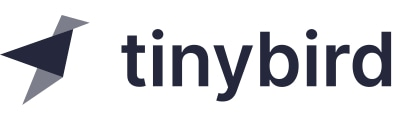
#Principles of Real-Time Analytics Course

`Copy to Drive` (see above) the Notebook.

In [2]:
#@title Mount your Google Drive to save and use local files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/Tinybird"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Tinybird


In [3]:
#@title Install Tinybird CLI and your token
!pip install tinybird-cli -q -U

import os

if not os.path.isdir('./datasources'):
  !tb init

if not os.path.isfile('.tinyb'): 
  !tb auth

     |████████████████████████████████| 72 kB 902 kB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 81 kB 7.3 MB/s 
     |████████████████████████████████| 61 kB 6.6 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Notebook Purpose

|create           | 
| ----------------- |
| events.datasource|

#Tinybird Events Dataset
Synthetic data of 100 M rows of website events.


Generate a data source file from the CSV URL.

In [5]:
!tb datasource generate https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_1.csv

** Generated datasources/events_50M_1.datasource
** => Create it on the server running: $ tb push datasources/events_50M_1.datasource
** => Append data using: $ tb datasource append events_50M_1 https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_1.csv`



In [6]:
!mv datasources/events_50M_1.datasource datasources/events.datasource

In [7]:
!cat datasources/events.datasource

DESCRIPTION generated from https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_1.csv

SCHEMA >
    `date` DateTime,
    `product_id` String,
    `user_id` Int64,
    `event` String,
    `extra_data` String

Push the data source file to Tinybird.

In [7]:
!tb push datasources/events.datasource

** Processing datasources/events.datasource
** Building dependencies
** Running events 
** 'events' created
** Not pushing fixtures


Add the data for the first 50 M rows.

In [8]:
!tb datasource append events https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_1.csv

** 🥚 starting import process
** 🐥 done
** Total rows in events: 50000000
** Data appended to Data Source 'events' successfully!
** Data pushed to events


Add the data for the next 50 M rows.

In [9]:
!tb datasource append events https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_2.csv

** 🥚 starting import process
** 🐥 done
** Total rows in events: 100000000
** Data appended to Data Source 'events' successfully!
** Data pushed to events


Query your data.

In [10]:
!tb sql "SELECT count() FROM events"

-------------
|   count() |
-------------
| 100000000 |
-------------


In [11]:
!tb sql --stats "SELECT * FROM events LIMIT 1"

** Query took 0.005681898 seconds
** Rows read: 1
** Bytes read: 115 bytes
------------------------------------------------
date: 2015-11-22 00:00:00
product_id: 6acf8c3a-1aaa-11eb-ab5e-acde48001122
user_id: 396547
event: remove_item_from_cart
extra_data: {"city": "Jackson"}
------------------------------------------------


In [12]:
!tb sql --rows_limit 1 --stats "SELECT * FROM events"

** Query took 0.006879204 seconds
** Rows read: 40,960
** Bytes read: 4.61 MB
------------------------------------------------
date: 2015-11-22 00:00:00
product_id: 6acf8c3a-1aaa-11eb-ab5e-acde48001122
user_id: 396547
event: remove_item_from_cart
extra_data: {"city": "Jackson"}
------------------------------------------------


In the Tinybird UI:

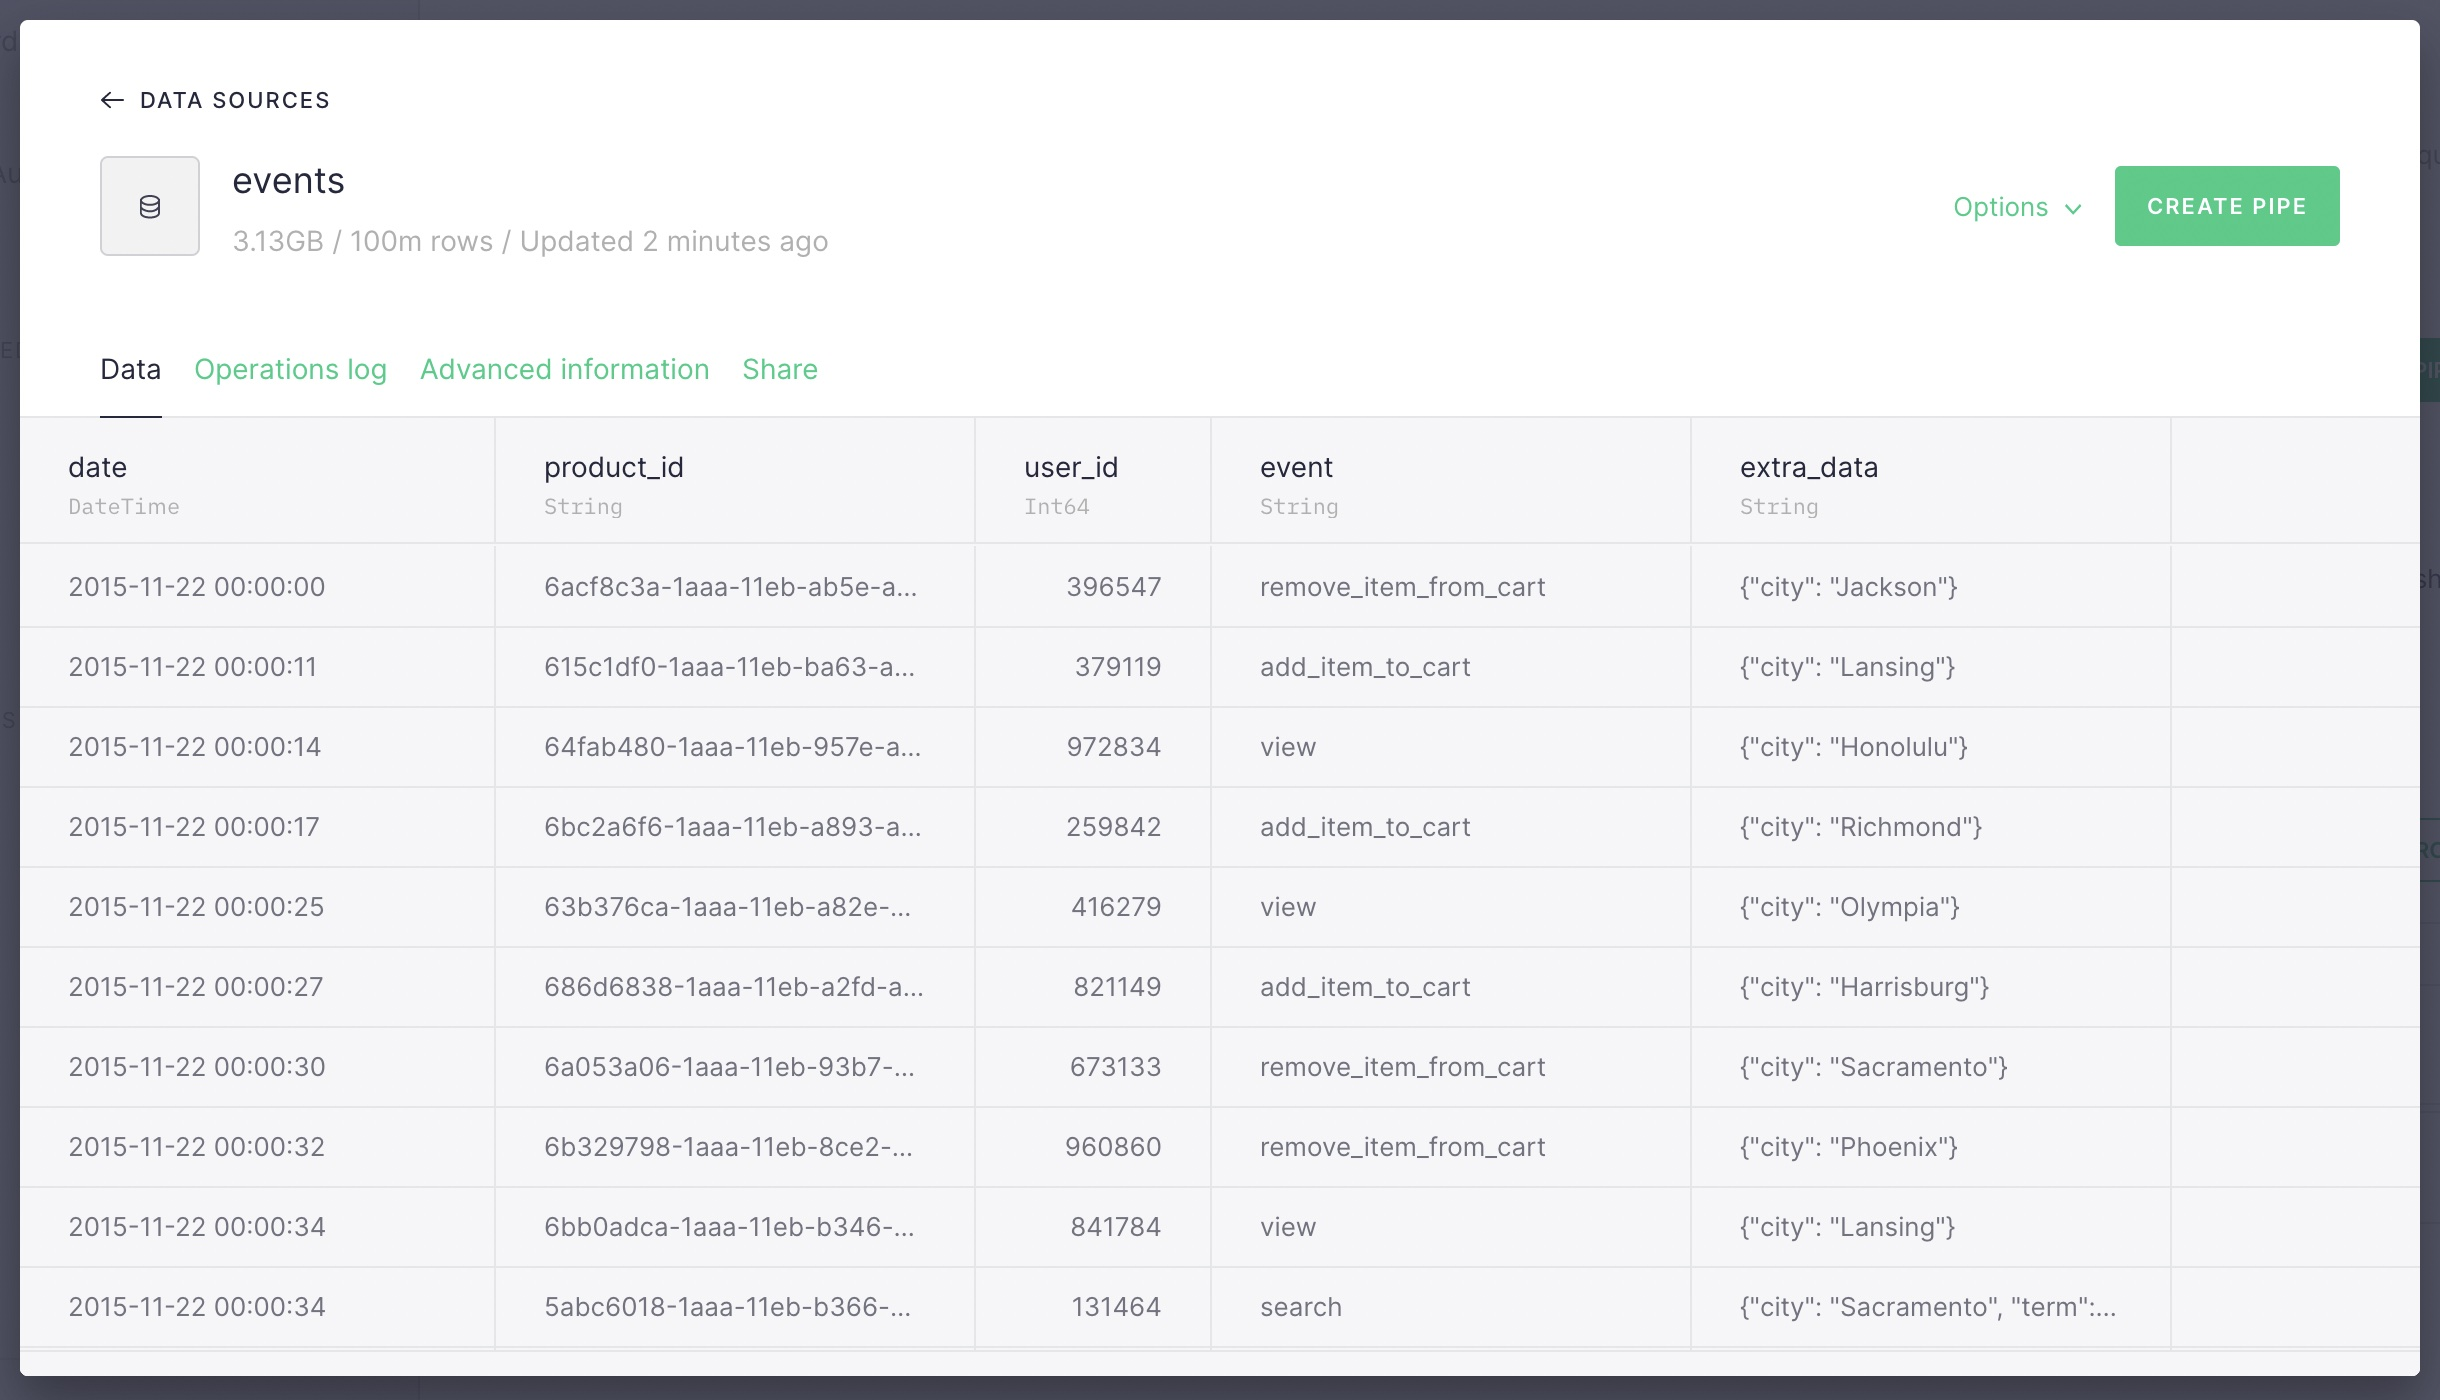